In [1]:
# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
 


# Importing required packages and libraries
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import math
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from  sklearn.decomposition  import  PCA
from sklearn import svm

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale
 
from  sklearn.model_selection  import  GridSearchCV

import matplotlib.image as mpimg
import random
import os,sys
from scipy import stats
 
from skimage.color import rgb2gray

import re
from keras_preprocessing.image import ImageDataGenerator

import tifffile as tiff
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
plt.style.use('default')

from glob import glob

# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
 
from sklearn.svm import SVC
 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
 
from sklearn.model_selection import train_test_split
# from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

import os
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print(f'Tensorflow version {tf.__version__}')

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from  keras.wrappers.scikit_learn  import  KerasClassifier
from  sklearn.model_selection  import  GridSearchCV
from keras.utils import np_utils
from PIL import Image
 
import time

import logging
logging.getLogger("tensorflow").setLevel((logging.WARNING))

Tensorflow version 2.12.0


In [2]:

# Set the path to the directory containing the tif images
img_dir = ("C:\\Users\\mseme\\OneDrive\\Documents\\CS5661 Topics in Adv Data Science\\FinalProject_Histopathologic_Cancer_Detection\\Files\\Image")

# Set the path to the CSV file containing the id-label mapping
# result = pd.read_csv("C:/Users/mseme\OneDrive\Documents\CS5661 Topics in Adv Data Science\FinalProject_Histopathologic_Cancer_Detection\Files\BalancedDataCompressedAutoEncoderPlusPCA.csv", index_col=0) 
result = pd.read_csv('BalancedDataCompressedAutoEncoderPlusPCA.csv', index_col=0)

label = result['label']

label
# Load the id-label mapping file into a DataFrame
# id_df = pd.read_csv(id_file,index_col=0)

# id_df
# id_file

# id_file['label'].value_counts()

0        1
1        1
2        1
3        0
4        1
        ..
19995    1
19996    1
19997    0
19998    0
19999    1
Name: label, Length: 20000, dtype: int64

In [3]:
result.head()

,file name,label,0,1,2,3,4,5,6,7,...,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114
0,fe520665f21f76336f312f8f68bcd4831c057dd5,1,0.177551,-9.586820,-8.566801,-2.741533,4.088705,-2.601283,-2.538927,0.708467,...,-0.081534,-0.002311,-0.057945,0.017998,0.130523,-0.149506,0.013944,-0.100151,0.081980,0.089024
1,7cf8a043a6185d130ac7b3ac29131ef56a0a1dea,1,-2.219753,-8.986357,-7.431108,0.039660,3.985695,-1.272582,1.870875,1.217411,...,0.104494,-0.241981,0.085478,-0.134899,-0.016479,0.083136,-0.155667,-0.050047,0.081754,-0.144524
2,b1bbbb20cf222ebc90058e3b28c1b57d460375a3,1,-7.285353,-4.389901,-2.301738,3.631255,-5.471744,-3.653268,0.952643,-0.615656,...,0.048240,-0.052129,0.172595,-0.095746,0.076016,0.112851,-0.026718,0.071247,-0.051166,0.142570
3,eda2fdea00f4d45ffeab69bef3905bd00439c3f9,0,7.198379,8.367715,-1.824436,0.058183,-0.578592,3.013971,4.789231,1.722777,...,0.130234,-0.018426,0.001495,0.043898,0.018813,-0.057775,0.011729,0.051898,-0.030612,0.071710
4,d7786b09f5fc66182046e4742667a7529a8fa71b,1,-8.866398,15.523893,2.956651,1.666184,-1.177167,-1.440076,6.350306,1.654882,...,-0.057908,0.072258,0.060307,-0.121543,0.086209,0.025314,0.078836,0.083207,-0.023780,0.093864


## Train Test Split

In [4]:
# splitting the dataset randomly with 30% being the testing set
X_train, X_test, y_train, y_test = train_test_split((result[result.columns[2:]]), label, test_size=0.3, random_state=1)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(14000, 2115)
(14000,)
(6000, 2115)
(6000,)


## Logistic Regression

In [5]:
# instantiating a LogisticRegression object
logReg = LogisticRegression(max_iter = 10000)

# fitting
logReg.fit(X_train, y_train)

# predicting
y_predict_LogReg = logReg.predict(X_test)

# calculating accuracy
score = accuracy_score(y_test, y_predict_LogReg)
print("Logistic Regression Accuracy: " + str(score))

# estimating probability of each label
y_prob = logReg.predict_proba(X_test)

Logistic Regression Accuracy: 0.748


In [6]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_LogReg)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_prob)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_prob[:,1])

11456    1
16528    1
3253     0
18614    1
1544     1
        ..
12696    1
14288    1
18768    0
3950     1
8871     0
Name: label, Length: 6000, dtype: int64
[1 0 0 ... 1 0 0]
[[0.07520677 0.92479323]
 [0.75960162 0.24039838]
 [0.64688873 0.35311127]
 ...
 [0.02435066 0.97564934]
 [0.97890163 0.02109837]
 [0.98862548 0.01137452]]
[0.92479323 0.24039838 0.35311127 ... 0.97564934 0.02109837 0.01137452]


In [7]:
# True positive rate and False positive rate
fpr_logReg, tpr_logReg, thresholds = metrics.roc_curve(y_test, y_prob[:,1], pos_label=1)

print(fpr_logReg)
print("\n\n")
print(tpr_logReg)
print("\n\n")


[0.00000000e+00 3.31564987e-04 3.31564987e-04 ... 9.98673740e-01
 9.98673740e-01 1.00000000e+00]



[0.         0.         0.0016756  ... 0.99966488 1.         1.        ]





In [8]:
# AUC:
AUC_logReg = metrics.auc(fpr_logReg, tpr_logReg)
print("AUC: " + str(AUC_logReg))

AUC: 0.814373386620775


## Ada Boost

In [9]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 100, random_state=2)

# fitting/training dataset
my_AdaBoost.fit(X_train, y_train)

# predicting labels
y_adaBoostPredict = my_AdaBoost.predict(X_test)

# calculating accuracy
score = accuracy_score(y_test, y_adaBoostPredict)
print("ADABoost Classifier Accuracy: " + str(score))

# estimating probability 
y_predict_prob = my_AdaBoost.predict_proba(X_test)


ADABoost Classifier Accuracy: 0.7635


In [10]:
# calculating false and true positive rate 
fpr_ada, tpr_ada, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

print(fpr_ada)
print("\n\n")
print(tpr_ada)
print("\n\n")
# AUC
AUC_ada = metrics.auc(fpr_ada, tpr_ada)
print("AUC: " + str(AUC_ada))

[0.        0.        0.        ... 0.9933687 0.9933687 1.       ]



[0.00000000e+00 3.35120643e-04 9.38337802e-03 ... 9.99664879e-01
 1.00000000e+00 1.00000000e+00]



AUC: 0.8366366865546396


# Plotting the ROC curves: 

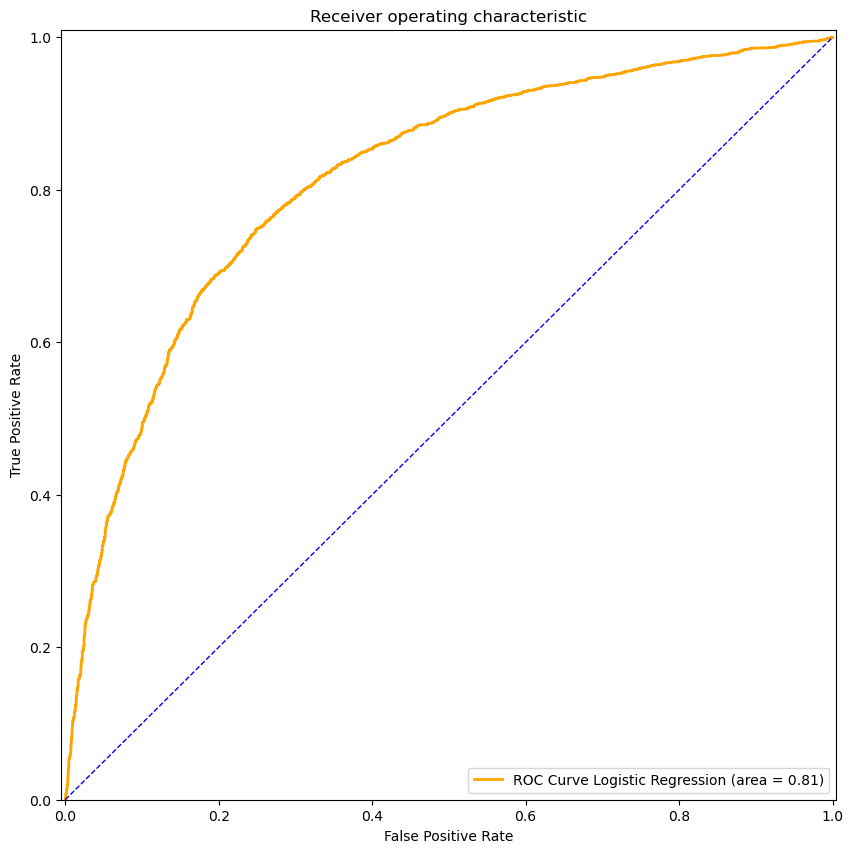

In [11]:
%matplotlib inline

plt.figure(figsize=(10,10))
# plt.figure()


# Roc Curve:
plt.plot(fpr_logReg, tpr_logReg, color='orange', lw=2, label='ROC Curve Logistic Regression (area = %0.2f)' % AUC_logReg)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

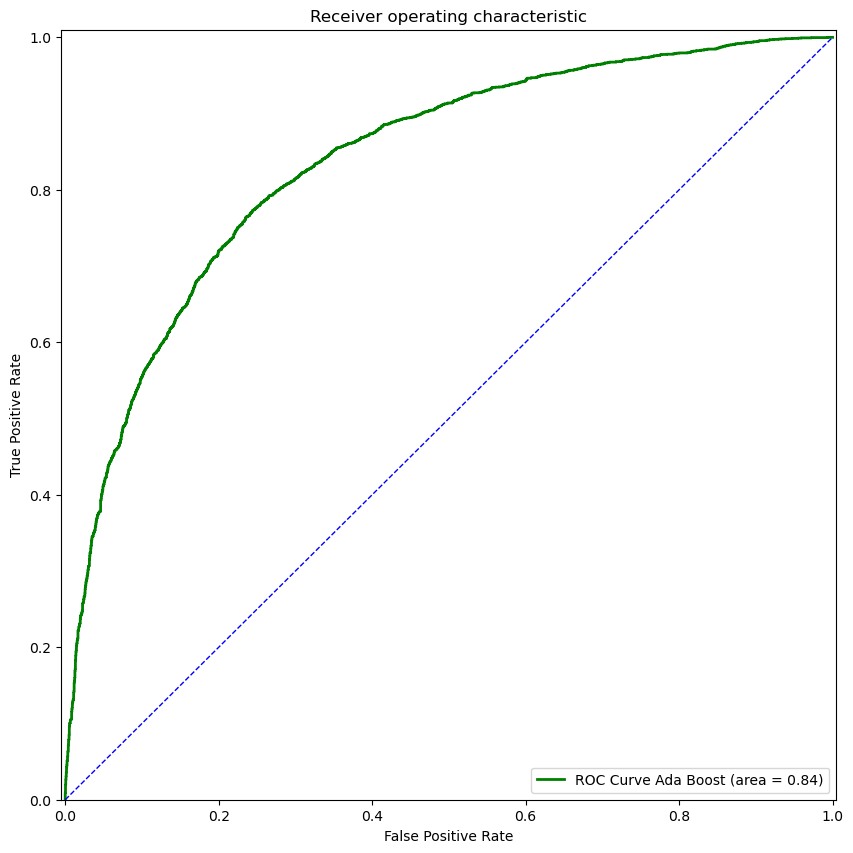

In [12]:
%matplotlib inline

plt.figure(figsize=(10,10))
# plt.figure()


# Roc Curve:
plt.plot(fpr_ada, tpr_ada, color='green', lw=2, label='ROC Curve Ada Boost (area = %0.2f)' % AUC_ada)
 
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Confusion Matrix

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 

In [14]:
cm_LogReg = confusion_matrix(y_test,y_predict_LogReg)

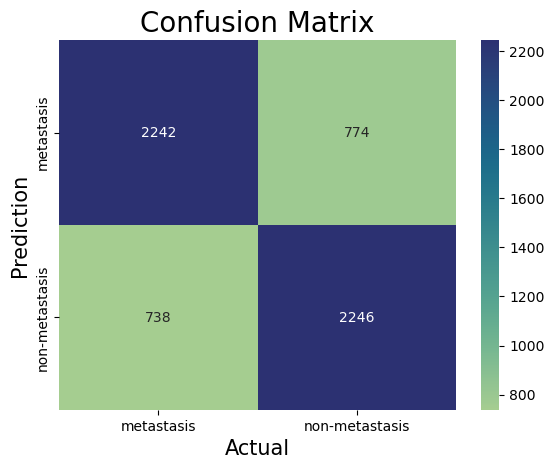

In [15]:
#Plot the confusion matrix.
sns.heatmap(cm_LogReg, annot=True, fmt='g', cmap="crest",
            xticklabels=['metastasis', 'non-metastasis'],
            yticklabels=['metastasis', 'non-metastasis'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

In [16]:
# Finding precision and recall
#Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_predict_LogReg)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_predict_LogReg)
print("Precision :", precision)
recall = recall_score(y_test, y_predict_LogReg)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_predict_LogReg)
print("F1-score  :", F1_score)

Accuracy   : 0.748
Precision : 0.7437086092715232
Recall    : 0.7526809651474531
F1-score  : 0.748167888074617


In [17]:
cm_AdaBoost = confusion_matrix(y_test,y_adaBoostPredict)

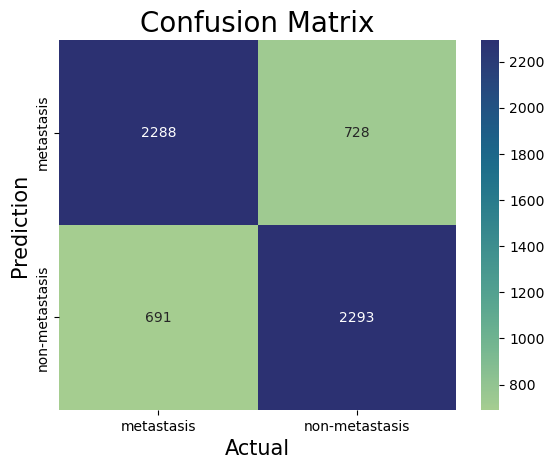

In [18]:
#Plot the confusion matrix.
sns.heatmap(cm_AdaBoost, annot=True, fmt='g', cmap="crest",
            xticklabels=['metastasis', 'non-metastasis'],
            yticklabels=['metastasis', 'non-metastasis'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

In [19]:
# Finding precision and recall
#Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_adaBoostPredict)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_adaBoostPredict)
print("Precision :", precision)
recall = recall_score(y_test, y_adaBoostPredict)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_adaBoostPredict)
print("F1-score  :", F1_score)

Accuracy   : 0.7635
Precision : 0.7590201919894075
Recall    : 0.7684316353887399
F1-score  : 0.7636969192339716
